In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras import optimizers

Using TensorFlow backend.


In [2]:
# load datasets
dataset = np.loadtxt('ds_3dof_large.csv', delimiter=",")
# make sure we alwayse generate psuedo-random number sequence
np.random.seed(8)

In [3]:
print(dataset.shape[0])

50653


In [4]:
# select 15000 random rows for trainong
idx =random.sample(range(0, dataset.shape[0]), 48000) # np.random.randint(dataset.shape[0], size=16000)

# training dataset
x_train=dataset[idx, 3:] # input last two columns
y_train=dataset[idx, :3] # output first three columns

# Delete element at index positions which are used
dataset = np.delete(dataset, idx, axis=0)
print(x_train.shape)
print(dataset.shape)


(48000, 2)
(2653, 5)


In [5]:
# select 2000 random rows for remaining dataset for testing
idx = random.sample(range(0, dataset.shape[0]), 2000)
# testing dataset
x_test=dataset[idx, 3:]
y_test=dataset[idx, :3]
# Delete element at index positions which are used
dataset = np.delete(dataset, idx, axis=0)
print(y_test.shape)
print(dataset.shape)

(2000, 3)
(653, 5)


In [6]:
# select remainig rows for prediction
x_predict=dataset[:, 3:]
y_predict=dataset[:, :3]
print(x_predict.shape)
print(x_predict.shape)

(653, 2)
(653, 2)


In [7]:
# input vector shape
# number of collumns must equal to units of last layer
print('Training dataset has ', x_train.shape[0] , 'entries of', x_train.shape[1],'input veriable(s)')
# output dataset shape
# number of collumns must equal to input dimention of first layer
print('Training dataset has ', y_train.shape[0] , 'entries of', y_train.shape[1],'output veriable(s)')


Training dataset has  48000 entries of 2 input veriable(s)
Training dataset has  48000 entries of 3 output veriable(s)


In [8]:
model = Sequential()
# first layer has 8 units and input_dim is dimention of input state vector
# relu activation is simple and linear 
# model.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=2))
#model.add(Dense(units=32, use_bias=True, kernel_initializer='normal',activation='relu'))
# model.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=2))

model.add(Dense(units=8, kernel_initializer="normal",activation='relu', input_dim=2))  
model.add(Dense(units=64, kernel_initializer="normal",activation='relu'))
model.add(Dense(units=128, kernel_initializer="normal",activation='relu'))
model.add(Dense(units=128, kernel_initializer="normal",activation='relu'))
model.add(Dense(units=128, kernel_initializer="normal",activation='relu'))
model.add(Dense(units=64, kernel_initializer="normal",activation='relu'))
model.add(Dense(units=8, kernel_initializer="normal",activation='relu'))
model.add(Dense(3, kernel_initializer="normal"))


# show model summary # model.summary() 


In [9]:
# compile model

#optm = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#optm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #
#model.compile(loss='mean_absolute_error', optimizer=optm, metrics=['accuracy'])  # mean squared error

model.compile(loss='mean_absolute_error', optimizer= 'adam', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# train model for loaded dataset 
history = model.fit(x_train, y_train, batch_size=200, epochs=200, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 2000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 21us/step - loss: 2.3541 - acc: 0.3344 - val_loss: 2.3573 - val_acc: 0.3335
Epoch 2/200
48000/48000 [==============================] - 1s 13us/step - loss: 2.3427 - acc: 0.3367 - val_loss: 2.3568 - val_acc: 0.3400
Epoch 3/200
48000/48000 [==============================] - 1s 10us/step - loss: 2.3424 - acc: 0.3318 - val_loss: 2.3567 - val_acc: 0.3400
Epoch 4/200
48000/48000 [==============================] - 0s 10us/step - loss: 2.3424 - acc: 0.3318 - val_loss: 2.3567 - val_acc: 0.3400
Epoch 5/200
48000/48000 [==============================] - 0s 10us/step - loss: 2.3423 - acc: 0.3318 - val_loss: 2.3566 - val_acc: 0.3400
Epoch 6/200
48000/48000 [==============================] - 0s 10us/step - loss: 2.3423 - acc: 0.3318 - val_loss: 2.3566 - val_acc: 0.3400
Epoch 7/200
48000/48000 [==============================] - 0s 10us/step - l

Epoch 116/200
48000/48000 [==============================] - 1s 25us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 117/200
48000/48000 [==============================] - 1s 22us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 118/200
48000/48000 [==============================] - 1s 18us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 119/200
48000/48000 [==============================] - 1s 19us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 120/200
48000/48000 [==============================] - 1s 21us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 121/200
48000/48000 [==============================] - 1s 20us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 122/200
48000/48000 [==============================] - 1s 19us/step - loss: 2.3422 - acc: 0.3358 - val_loss: 2.3566 - val_acc: 0.3335
Epoch 123/200
48000/

In [11]:
# Test model
score = model.evaluate(x_test, y_test, verbose=2)

In [12]:
print('Test accuracy:', score[1])


Test accuracy: 0.3335


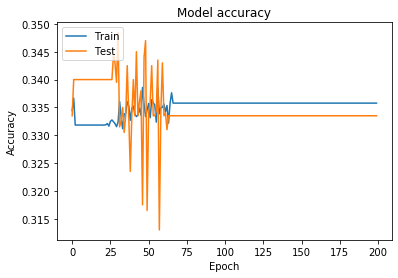

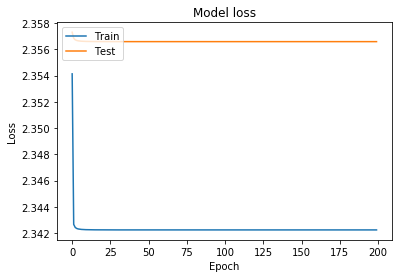

In [13]:
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

